# Data Analysis
In this script we analyze simple statistics of the final corpus.

---
### Important note

#### Download required files stored in Google Drive
This script requires the file `hydrated_tweets.json` that can be downloaded from the Google Drive Folder (`https://drive.google.com/drive/u/1/folders/16I4_ZCre59ufD9lDZbFK9cn1mALRmPjB`). The file must be stored in the `~/data` folder as specified in the README.

---

In [1]:
# We specify the path for importing modules
import sys
sys.path.append('../')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

In [3]:
# Read json data from the tweets
input_path = '../../data/'
input_filename = 'hydrated_tweets.json'

In [4]:
# Generate a dataframe
df_tweets = pd.read_json(input_path + input_filename)

In [5]:
df_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries
0,2020-11-19 15:32:48+00:00,1329447539595227137,1329447539595227136,How Amazon and COVID-19 influence 2020 seasona...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://amplifr.com"" rel=""nofollow"">A...",NaN,NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-19 15:32:48+00:00,1329447539658149888,1329447539658149888,Wow the U.S. already hit 250k+ deaths with COV...,False,"[0, 276]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-19 15:32:48+00:00,1329447542212452352,1329447542212452352,"Meanwhile, Air Canada is booking flights from ...",False,"[0, 118]","{'hashtags': [{'text': 'RDU', 'indices': [46, ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-19 15:32:48+00:00,1329447542405406721,1329447542405406720,@JMinnga @CNNnewsroom @jaketapper @CNN This wo...,False,"[39, 165]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.329444e+18,1.329444e+18,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-19 15:32:49+00:00,1329447545320443904,1329447545320443904,@ScottinBayV To believe what these outliers in...,False,"[13, 168]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.329400e+18,1.329400e+18,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("We have {} tweets.".format(len(df_tweets)))

We have 96359 tweets.


# Users analysis

In [7]:
def extract_user(user):
    return user['id_str']

In [10]:
def extract_followers(user):
    return user['followers_count']

In [11]:
df_tweets['user_id'] = df_tweets.user.apply(extract_user)
df_tweets['followers_count'] = df_tweets.user.apply(extract_followers)

In [13]:
print("There are {} unique users".format(len(df_tweets['user_id'].unique())))

There are 76905 unique users


In [32]:
tweets_per_user = df_tweets['user_id'].value_counts().values

In [15]:
tweets_per_user

array([128,  94,  73, ...,   1,   1,   1])

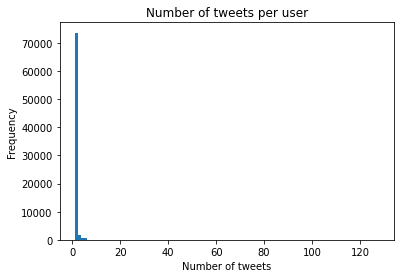

In [16]:
plt.hist(tweets_per_user, bins = 100)
plt.title('Number of tweets per user')
plt.xlabel('Number of tweets')
plt.ylabel('Frequency')
plt.show()

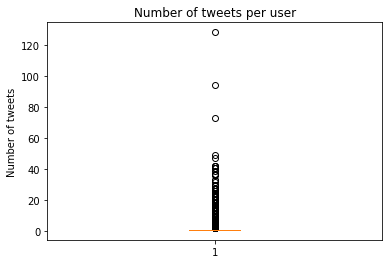

In [17]:
plt.boxplot(tweets_per_user)
plt.title('Number of tweets per user')
plt.ylabel('Number of tweets')
plt.show()

In [18]:
print('Average tweets per user = {}'.format(tweets_per_user.mean()))

Average tweets per user = 1.2529614459397957


In [19]:
print('Median tweets per user = {}'.format(np.median(tweets_per_user)))

Median tweets per user = 1.0


In [20]:
print('Maximum tweets per user = {}'.format(tweets_per_user.max()))

Maximum tweets per user = 128


In [34]:
# Take unique followers for each user (get maximum value)
followers = df_tweets.groupby(['user_id'], sort=False)['followers_count'].max()

In [35]:
followers

user_id
50654874               3258
762837810793459712      455
305014668              1013
849821088825716737      192
4270465462              119
                       ... 
963896581777952772      671
862615902              5212
1026516459411918849     961
877286680314642432      293
759126756003577857      193
Name: followers_count, Length: 76905, dtype: int64

In [36]:
followers = followers.values

In [37]:
print('Average followers per user = {}'.format(followers.mean()))

Average followers per user = 18237.12821012938


In [38]:
print('Median followers per user = {}'.format(np.median(followers)))

Median followers per user = 435.0


In [39]:
print('Maximum followers per user = {}'.format(followers.max()))

Maximum followers per user = 88870927


In [40]:
df_tweets[df_tweets['followers_count'] == 88870927]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,user_id,followers_count
41077,2020-11-19 16:36:58+00:00,1329463691205627910,1329463691205627904,THE COVID DRUGS NOW AVAILABLE TO MAKE PEOPLE B...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,25073877,88870927


This user is @realDonaldTrump!

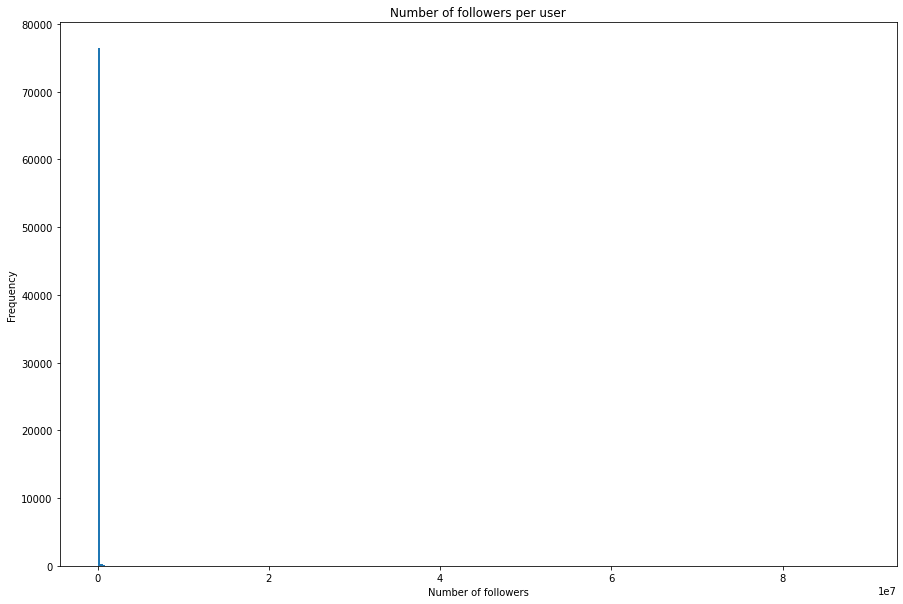

In [45]:
plt.figure(figsize=(15,10))
plt.hist(followers, bins = 300)
plt.title('Number of followers per user')
plt.xlabel('Number of followers')
plt.ylabel('Frequency')
plt.show()

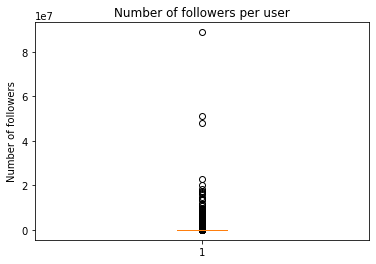

In [46]:
plt.boxplot(followers)
plt.title('Number of followers per user')
plt.ylabel('Number of followers')
plt.show()

# Interactions analysis

In [21]:
retweets = df_tweets['retweet_count'].values
favs = df_tweets['favorite_count'].values

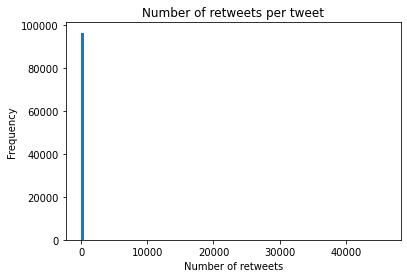

In [22]:
plt.hist(retweets, bins = 100)
plt.title('Number of retweets per tweet')
plt.xlabel('Number of retweets')
plt.ylabel('Frequency')
plt.show()

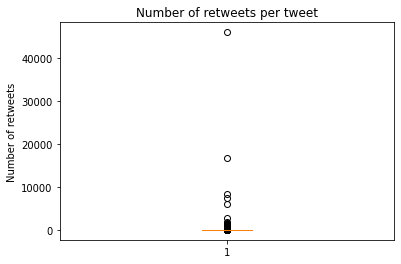

In [23]:
plt.boxplot(retweets)
plt.title('Number of retweets per tweet')
plt.ylabel('Number of retweets')
plt.show()

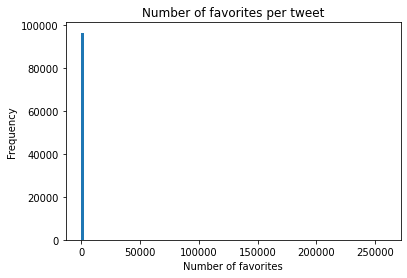

In [24]:
plt.hist(favs, bins = 100)
plt.title('Number of favorites per tweet')
plt.xlabel('Number of favorites')
plt.ylabel('Frequency')
plt.show()

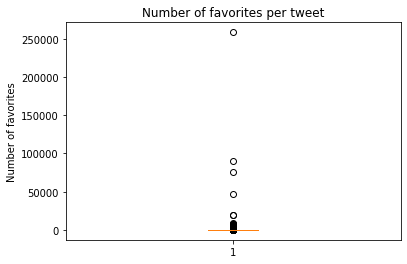

In [25]:
plt.boxplot(favs)
plt.title('Number of favorites per tweet')
plt.ylabel('Number of favorites')
plt.show()

In [26]:
print('Average retweets per tweet = {}'.format(retweets.mean()))

Average retweets per tweet = 2.2420635332454673


In [27]:
print('Median retweets per tweet = {}'.format(np.median(retweets)))

Median retweets per tweet = 0.0


In [28]:
print('Maximum retweets per tweet = {}'.format(retweets.max()))

Maximum retweets per tweet = 45969


In [29]:
print('Average favorites per tweet = {}'.format(favs.mean()))

Average favorites per tweet = 11.9267427017715


In [30]:
print('Median favorites per tweet = {}'.format(np.median(favs)))

Median favorites per tweet = 0.0


In [31]:
print('Maximum favorites per tweet = {}'.format(favs.max()))

Maximum favorites per tweet = 258585
